Análisis del despliegue de discursos discriminatorios y de odio durante la pandemia en TWITTER

LINK A FUENTE

LINK A ARTICULO

In [1]:

import pandas as pd


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Replace 'your_file_path' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/2. Data-work/python-space/hate_speech/df_tweets_arg.csv'



Mounted at /content/drive


Tw_arg tiene ya solo los medios de Argentina

'LANACION',
'clarincom',
'cronica',
'infobae',
'izquierdadiario',
'laderechadiario',
'laderechamedios',
'pagina12',
'perfilcom'

In [3]:
tw_arg = pd.read_csv(file_path)

In [4]:
diarios = ['LANACION',
'clarincom',
'cronica',
'infobae',
'izquierdadiario',
'laderechadiario',
'laderechamedios',
'pagina12',
'perfilcom']

In [5]:
tw_arg.head()

,tweet_id_noticia,user_noticia,date_noticia,title_noticia,url_noticia,tweet,date_tweet,APPEARANCE,CLASS,CRIMINAL,DISABLED,LGBTI,POLITICS,RACISM,WOMEN,CALLS
0,1376940813968609288,clarincom,2021-03-30 16:54:00.700,Segunda ola de coronavirus: preocupan las reun...,https://www.clarin.com/politica/segunda-ola-co...,@clarincom A mi me preocupa el trabajo.. La ev...,2021-03-30 17:03:00.900,0,0,0,0,0,0,0,0,0
1,1376940813968609288,clarincom,2021-03-30 16:54:00.700,Segunda ola de coronavirus: preocupan las reun...,https://www.clarin.com/politica/segunda-ola-co...,@clarincom Lo que preocupa. https://t.co/Vmf9V...,2021-03-30 17:05:04.500,0,0,0,0,0,0,0,0,0
2,1376940813968609288,clarincom,2021-03-30 16:54:00.700,Segunda ola de coronavirus: preocupan las reun...,https://www.clarin.com/politica/segunda-ola-co...,@clarincom Lo que les preocupa. https://t.co/P...,2021-03-30 17:06:03.100,0,0,0,0,0,0,0,0,0
3,1376940813968609288,clarincom,2021-03-30 16:54:00.700,Segunda ola de coronavirus: preocupan las reun...,https://www.clarin.com/politica/segunda-ola-co...,@clarincom Le recomendaríamos al presidente de...,2021-03-30 17:11:02.300,0,0,0,0,0,0,0,0,0
4,1376940813968609288,clarincom,2021-03-30 16:54:00.700,Segunda ola de coronavirus: preocupan las reun...,https://www.clarin.com/politica/segunda-ola-co...,@clarincom Para salvar al correo de la quiebra...,2021-03-30 17:26:00.600,0,0,0,0,0,0,0,0,0


In [6]:
tw_arg['date_tweet'] = pd.to_datetime(tw_arg['date_tweet'])
tw_arg['date_only'] = tw_arg['date_tweet'].dt.date
daily_counts = tw_arg.groupby('date_only').size().reset_index(name='tweet_count')
daily_counts

,date_only,tweet_count
0,2020-02-10,4513
1,2020-02-11,2407
2,2020-02-12,1815
3,2020-02-13,4446
4,2020-02-14,5992
...,...,...
496,2021-06-21,5709
497,2021-06-22,3501
498,2021-06-23,52
499,2021-06-24,51


In [10]:
hateful_columns = ['APPEARANCE', 'CLASS', 'CRIMINAL', 'DISABLED', 'LGBTI', 'POLITICS', 'RACISM', 'WOMEN']


In [14]:
tw_arg['HATEFUL'] = tw_arg[hateful_columns].any(axis=1)

In [20]:
daily_hateful_counts = tw_arg.groupby('date_only')['HATEFUL'].sum().reset_index(name='hateful_count')
daily_APPEARANCE_counts = tw_arg.groupby('date_only')['APPEARANCE'].sum().reset_index(name='APPEARANCE')
daily_CLASS_counts = tw_arg.groupby('date_only')['CLASS'].sum().reset_index(name='CLASS')
daily_CRIMINAL_counts = tw_arg.groupby('date_only')['CRIMINAL'].sum().reset_index(name='CRIMINAL')
daily_DISABLED_counts = tw_arg.groupby('date_only')['DISABLED'].sum().reset_index(name='DISABLED')
daily_LGBTI_counts = tw_arg.groupby('date_only')['LGBTI'].sum().reset_index(name='LGBTI')
daily_POLITICS_counts = tw_arg.groupby('date_only')['POLITICS'].sum().reset_index(name='POLITICS')
daily_RACISM_counts = tw_arg.groupby('date_only')['RACISM'].sum().reset_index(name='RACISM')
daily_WOMEN_counts = tw_arg.groupby('date_only')['WOMEN'].sum().reset_index(name='WOMEN')


In [23]:
daily_hateful = pd.merge(daily_counts, daily_hateful_counts, on='date_only', how='left')
daily_hateful = pd.merge(daily_hateful, daily_APPEARANCE_counts, on='date_only', how='left')
daily_hateful = pd.merge(daily_hateful, daily_CRIMINAL_counts, on='date_only', how='left')
daily_hateful = pd.merge(daily_hateful, daily_DISABLED_counts, on='date_only', how='left')
daily_hateful = pd.merge(daily_hateful, daily_LGBTI_counts, on='date_only', how='left')
daily_hateful = pd.merge(daily_hateful, daily_POLITICS_counts, on='date_only', how='left')
daily_hateful = pd.merge(daily_hateful, daily_RACISM_counts, on='date_only', how='left')
daily_hateful = pd.merge(daily_hateful, daily_WOMEN_counts, on='date_only', how='left')

daily_hateful.head()

,date_only,tweet_count,hateful_count,APPEARANCE,CRIMINAL,DISABLED,LGBTI,POLITICS,RACISM,WOMEN
0,2020-02-10,4513,255,60,37,23,10,78,46,19
1,2020-02-11,2407,137,60,10,21,5,39,8,14
2,2020-02-12,1815,136,28,25,7,14,33,37,20
3,2020-02-13,4446,252,57,19,28,30,86,23,39
4,2020-02-14,5992,341,100,18,42,33,90,29,66


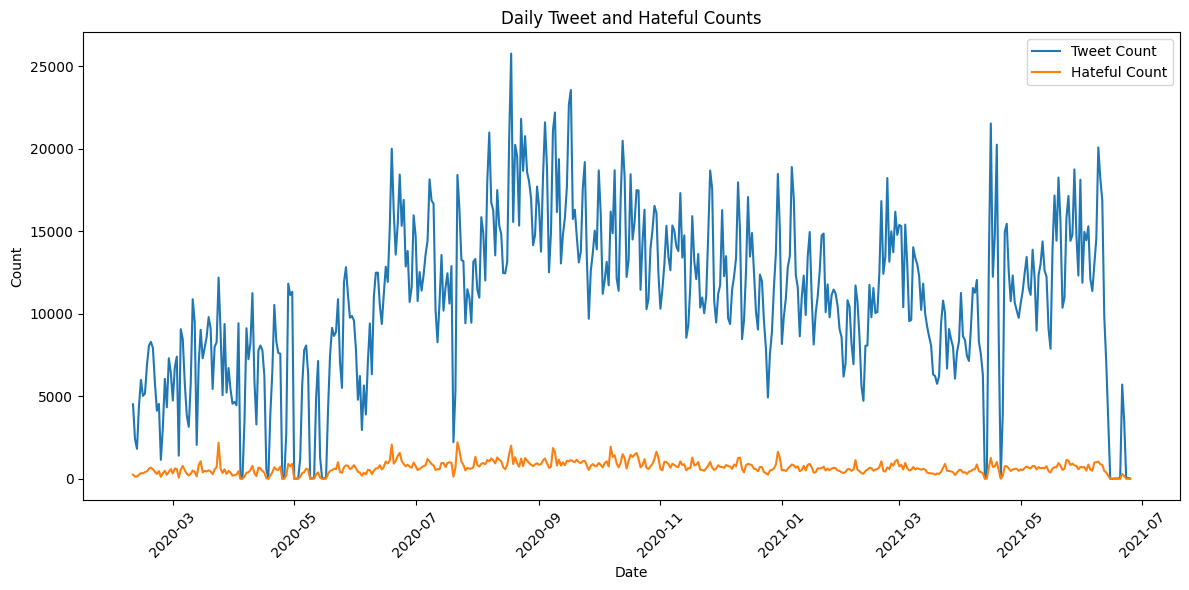

In [17]:
# prompt: plot tweet_count and hateful_count from daily_hateful_counts by date_only

import matplotlib.pyplot as plt

# Assuming daily_hateful DataFrame is already created as in the provided code

plt.figure(figsize=(12, 6))
plt.plot(daily_hateful['date_only'], daily_hateful['tweet_count'], label='Tweet Count')
plt.plot(daily_hateful['date_only'], daily_hateful['hateful_count'], label='Hateful Count')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Daily Tweet and Hateful Counts')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
# Assuming daily_hateful DataFrame is already created as in the provided code
file_path_output = '/content/drive/MyDrive/2. Data-work/python-space/hate_speech/daily_hateful.csv' #@param {type:"string"}
daily_hateful.to_csv(file_path_output, index=False)

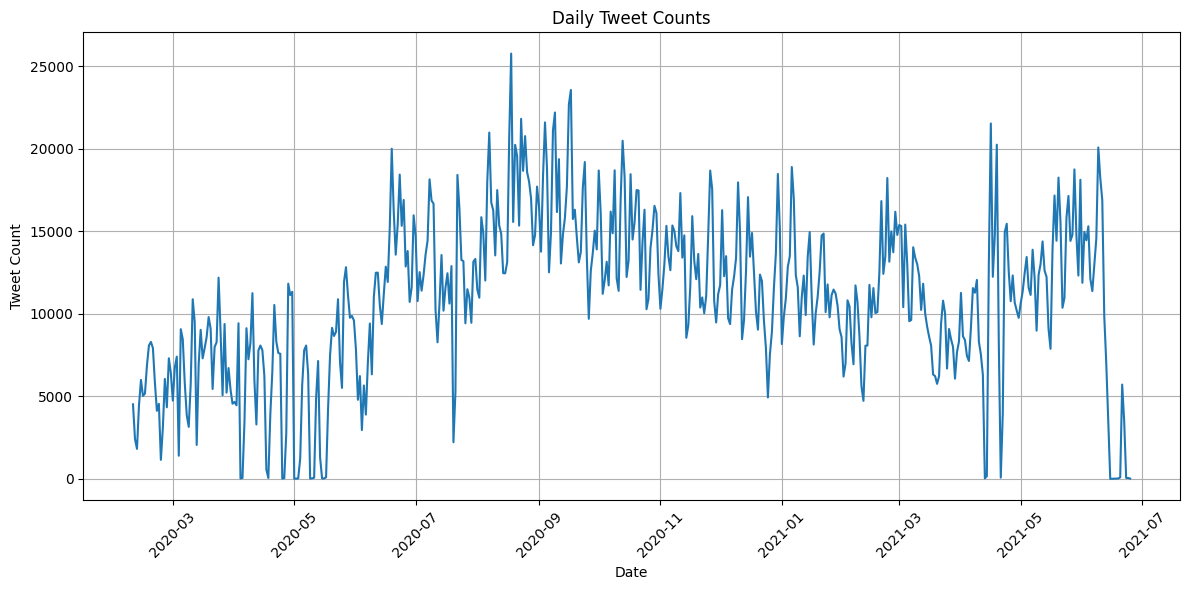

In [8]:
# Create the plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.plot(daily_counts['date_only'], daily_counts['tweet_count'])

# Customize the plot (optional)
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.title('Daily Tweet Counts')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Display the plot
plt.show()

In [ ]:
# prompt: calcular cantidad de 1 en  de cada feature: APPEARANCE	CLASS	CRIMINAL	DISABLED	LGBTI	POLITICS RACISM	WOMEN	CALLS

hateful_columns = ['APPEARANCE', 'CLASS', 'CRIMINAL', 'DISABLED', 'LGBTI', 'POLITICS', 'RACISM', 'WOMEN', 'CALLS']

# Calculate the sum of 1s for each hateful column
hate_counts = tw_arg[hateful_columns].sum()

hate_counts